# MNIST：ロジスティック回帰，SVMによる多クラス分類

## 参考
* [SVM MNIST digit classification in python using scikit-learn](https://github.com/ksopyla/svm_mnist_digit_classification)

## パッケージの読み込み

In [1]:
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets, model_selection, svm, metrics

## MNISTデータの準備

In [5]:
mnist = datasets.fetch_openml('mnist_784', data_home='data/download/')

print(type(mnist))
print(mnist.keys())

mnist_data = mnist.data / 255
mnist_label = mnist.target

print(mnist_data.shape)
print(mnist_label.shape)

train_size = 60000
test_size = 10000
data_train, data_test, label_train, label_test = model_selection.train_test_split(mnist_data, mnist_label, test_size=test_size, train_size=train_size)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])
(70000, 784)
(70000,)


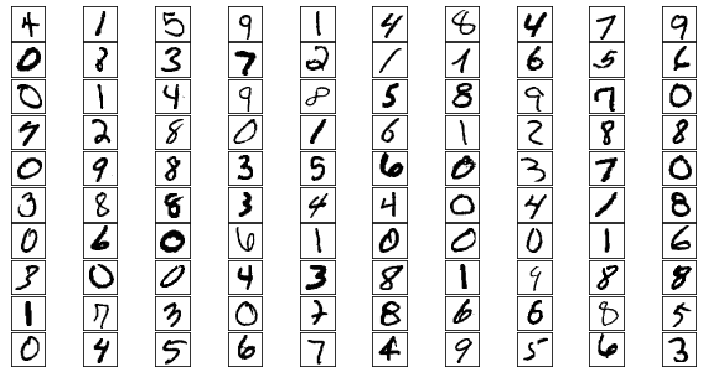

In [6]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(1-data_train[i].reshape((28, 28)), cmap='gray')

## ロジスティック回帰による分類

In [7]:
# フィッティング
clf_logistic = LogisticRegression()
clf_logistic.fit(data_train, label_train)
pre_logistic = clf_logistic.predict(data_test)

# 評価
ac_score_logistic = metrics.accuracy_score(label_test, pre_logistic)
print(ac_score_logistic)

/Users/noshita/.local/share/virtualenvs/Compbio2019-notebook-DLgTWvby/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noshita/.local/share/virtualenvs/Compbio2019-notebook-DLgTWvby/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9151


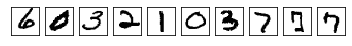

In [19]:
fig = plt.figure()
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(1-data_test[i+10].reshape((28, 28)), cmap='gray')

In [20]:
clf_logistic.predict(data_test[11:20])

array(['0', '3', '2', '1', '0', '3', '7', '5', '7'], dtype=object)

In [21]:
label_test[11:20]

array(['0', '3', '2', '1', '0', '3', '7', '7', '7'], dtype=object)

## Support Vector Machine (SVM)による分類

In [8]:
# フィッティング
clf_svm_1 = svm.SVC()
clf_svm_1.fit(data_train, label_train)
pre_svm_1 = clf_svm_1.predict(data_test)

# 評価
ac_score_svm_1 = metrics.accuracy_score(label_test, pre_svm_1)
print(ac_score_svm_1)

/Users/noshita/.local/share/virtualenvs/Compbio2019-notebook-DLgTWvby/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9408


In [22]:
clf_svm_1.predict(data_test[11:20])

array(['0', '3', '2', '1', '0', '3', '7', '3', '7'], dtype=object)

In [9]:
# フィッティング
clf_svm_2 = svm.SVC(C = 5, gamma = 0.05)
clf_svm_2.fit(data_train, label_train)
pre_svm_2 = clf_svm_2.predict(data_test)

# 評価
ac_score_svm_2 = metrics.accuracy_score(label_test, pre_svm_2)
print(ac_score_svm_2)

0.984
